# Test Assignment: Loading FITS and saving

In [15]:
# imports
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits
import photutils

plt.rcParams["font.family"] = "Times New Roman"
plt.rc('font', size=18)

# Loading data and plotting

Text(0, 0.5, 'y-axis [pixels]')

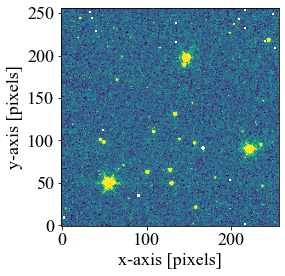

In [16]:
#from astropy documentation 
f_file = fits.open('test.fits')

data = f_file[0].data

plt.imshow(data, origin='lower', vmin= -10, vmax=20)
plt.xlabel("x-axis [pixels]")
plt.ylabel("y-axis [pixels]")

Brightest star seems to be the lower-left one. Will now zoom into it and find an approximate location for its center

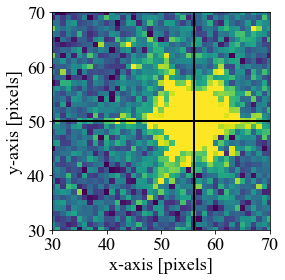

In [17]:
#zooming in to the star
plt.imshow(data, origin='lower', vmin= -10, vmax=20)
plt.xlabel("x-axis [pixels]")
plt.ylabel("y-axis [pixels]")
plt.ylim(30,70)
plt.xlim(30,70)

#guessing central positions and plotting them as black lines
x_guess = 56
y_guess = 50
plt.axvline(x_guess, c='k', lw=2)
plt.axhline(y_guess, c='k', lw=2)

# Creating cutout and saving it

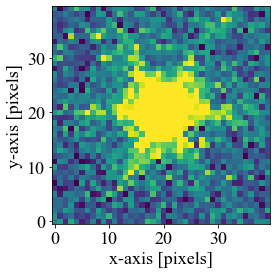

In [19]:
cutout = data[y_guess-20:y_guess+20, x_guess-20:x_guess+20]
plt.imshow(cutout, origin='lower', vmin=-10, vmax=20.)
plt.xlabel("x-axis [pixels]")
plt.ylabel("y-axis [pixels]")

hdu = fits.PrimaryHDU(cutout)
hdu.writeto('test2.fits', overwrite=True)

# Measuring Centroid using Photutils

In [20]:
photutils.centroids.centroid_sources(data, x_guess, y_guess)

(array([55.78048699]), array([50.16458808]))